In [1]:
import os
import pandas as pd
import nltk
from newsapi import NewsApiClient
from dotenv import load_dotenv
load_dotenv()



True

In [2]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\14697\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [3]:
# Read your api key environment variable
api_key =os.getenv("NEWS_API_KEY")


In [4]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [5]:
# Fetch the Bitcoin news articles
bitcoin = newsapi.get_everything(q="bitcoin", language="en")
bitcoin                                  
                                   

{'status': 'ok',
 'totalResults': 3858,
 'articles': [{'source': {'id': 'techcrunch', 'name': 'TechCrunch'},
   'author': 'Jonathan Shieber',
   'title': 'Casa pivots to provide self-custody services to secure bitcoin',
   'description': 'Casa, a Colorado-based provider of bitcoin security services, is launching a managed service allowing customers to buy and hold their own bitcoin, rather than using an external custodian like Coinbase. “With self-custody using Casa it’s impossible to be hacke…',
   'url': 'http://techcrunch.com/2020/08/06/casa-pivots-to-provide-self-custody-services-to-secure-bitcoin/',
   'urlToImage': 'https://techcrunch.com/wp-content/uploads/2019/06/GettyImages-1050523528.jpg?w=600',
   'publishedAt': '2020-08-06T18:25:29Z',
   'content': 'Casa, a Colorado-based provider of bitcoin security services, is launching a managed service allowing customers to buy and hold their own bitcoin, rather than using an external custodian like Coinbas… [+1571 chars]'},
  {'source

In [6]:
# Fetch the Ethereum news articles
ethereum = newsapi.get_everything(q="ethereum", language="en")
ethereum

{'status': 'ok',
 'totalResults': 1342,
 'articles': [{'source': {'id': 'mashable', 'name': 'Mashable'},
   'author': 'Stan Schroeder',
   'title': 'Crypto wallet MetaMask finally launches on iOS and Android, and it supports Apple Pay',
   'description': "If you've interacted with cryptocurrencies in the past couple of years, there's a good chance you've used MetaMask. It's a cryptocurrency wallet in the form of a browser extension that supports Ethereum and its ecosystem, making it easy to connect with a dece…",
   'url': 'https://mashable.com/article/metamask-ios-android/',
   'urlToImage': 'https://mondrian.mashable.com/2020%252F09%252F02%252Ffd%252Fe724b5edb4b644dba45958e17ad591e1.6b9c6.png%252F1200x630.png?signature=xIKBM112GVhTA9mUq0DRjCVGWSE=',
   'publishedAt': '2020-09-02T16:00:00Z',
   'content': "If you've interacted with cryptocurrencies in the past couple of years, there's a good chance you've used MetaMask. It's a cryptocurrency wallet in the form of a browser extension t

In [7]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_df = pd.DataFrame.from_dict(bitcoin["articles"])
bitcoin_df.tail(5)

,source,author,title,description,url,urlToImage,publishedAt,content
15,"{'id': 'the-next-web', 'name': 'The Next Web'}",Satoshi Nakaboto,Satoshi Nakaboto: ‘Swiss health insurer now ac...,Our robot colleague Satoshi Nakaboto writes ab...,https://thenextweb.com/hardfork/2020/09/01/sat...,https://img-cdn.tnwcdn.com/image/hardfork?filt...,2020-09-01T08:57:56Z,Our robot colleague Satoshi Nakaboto writes ab...
16,"{'id': 'the-next-web', 'name': 'The Next Web'}",Satoshi Nakaboto,Satoshi Nakaboto: ‘Big dog billionaire investo...,Our robot colleague Satoshi Nakaboto writes ab...,https://thenextweb.com/hardfork/2020/08/19/sat...,https://img-cdn.tnwcdn.com/image/hardfork?filt...,2020-08-19T09:34:33Z,Our robot colleague Satoshi Nakaboto writes ab...
17,"{'id': 'the-next-web', 'name': 'The Next Web'}",Satoshi Nakaboto,Satoshi Nakaboto: ‘Pornhub now accepts Bitcoin’,Our robot colleague Satoshi Nakaboto writes ab...,https://thenextweb.com/hardfork/2020/09/02/sat...,https://img-cdn.tnwcdn.com/image/hardfork?filt...,2020-09-02T09:02:09Z,Our robot colleague Satoshi Nakaboto writes ab...
18,"{'id': 'the-next-web', 'name': 'The Next Web'}",Satoshi Nakaboto,Satoshi Nakaboto: ‘Bitcoin dives 5% after hitt...,Our robot colleague Satoshi Nakaboto writes ab...,https://thenextweb.com/hardfork/2020/09/03/sat...,https://img-cdn.tnwcdn.com/image/hardfork?filt...,2020-09-03T08:52:31Z,Our robot colleague Satoshi Nakaboto writes ab...
19,"{'id': 'reuters', 'name': 'Reuters'}",Reuters Editorial,Time to buy Bitcoin: ex-Prudential CEO George ...,"George Ball, now CEO of Sanders Morris Harris,...",https://www.reuters.com/video/watch/idRCV008LQI,https://static.reuters.com/resources/r/?d=2020...,2020-08-14T20:27:28Z,"Posted \r\nGeorge Ball, now CEO of Sanders Mor..."


In [8]:
bitcoin_sentiments = []

for article in bitcoin["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:20]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_sent = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
bitcoin_sent = bitcoin_sent[cols]
bitcoin_sent.head(5)

,date,text,compound,positive,negative,neutral
0,2020-08-06T18:25:29Z,"Casa, a Colorado-based provider of bitcoin sec...",0.5994,0.149,0.000,0.851
1,2020-08-06T16:16:32Z,"The question still remained, though, whether a...",-0.0516,0.065,0.071,0.864
2,2020-08-23T12:19:36Z,“The COVID-19 pandemic has resulted in a mass ...,0.2732,0.063,0.000,0.937
3,2020-08-07T20:22:54Z,In what appears to be a massive coordinated st...,-0.1280,0.000,0.046,0.954
4,2020-08-17T15:59:00Z,LONDON (Reuters) - Bitcoin jumped to its highe...,0.3818,0.069,0.000,0.931


In [9]:
bitcoin_sent.describe()

,compound,positive,negative,neutral
count,20.00000,20.000000,20.000000,20.0000
mean,0.45144,0.092650,0.005850,0.9015
std,0.20556,0.037906,0.018457,0.0335
min,-0.12800,0.000000,0.000000,0.8020
25%,0.50700,0.090000,0.000000,0.9100
50%,0.50700,0.090000,0.000000,0.9100
75%,0.50700,0.090000,0.000000,0.9100
max,0.75060,0.198000,0.071000,0.9540


In [10]:
# Create the ethereum sentiment scores DataFrame
ethereum_df = pd.DataFrame.from_dict(ethereum["articles"])

In [11]:
# Describe the Ethereum Sentiment
ethereum_sentiments = []

for article in ethereum["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:20]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_sent = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
cols = ["text", "date", "compound", "positive", "negative", "neutral"]
ethereum_sent = ethereum_sent[cols]

In [12]:
ethereum_sent.head()

,text,date,compound,positive,negative,neutral
0,If you've interacted with cryptocurrencies in ...,2020-09-02T16:00:00Z,0.7506,0.209,0.000,0.791
1,TL;DR: The Mega Blockchain Mastery Bundle is o...,2020-08-17T04:00:00Z,0.0000,0.000,0.000,1.000
2,LONDON (Reuters) - It sounds like a surefire b...,2020-08-26T06:07:00Z,0.7579,0.181,0.000,0.819
3,NEW YORK (Reuters) - Brooklyn-based technology...,2020-08-25T13:01:00Z,0.0000,0.000,0.000,1.000
4,An outspoken Bitcoin whale who rarely shows af...,2020-08-19T07:04:25Z,-0.2677,0.045,0.074,0.881


In [13]:
ethereum_sent.describe()

,compound,positive,negative,neutral
count,17.000000,17.000000,17.000000,17.000000
mean,0.191500,0.072647,0.023647,0.903706
std,0.385822,0.072571,0.056465,0.094481
min,-0.599400,0.000000,0.000000,0.732000
25%,0.000000,0.000000,0.000000,0.819000
50%,0.000000,0.062000,0.000000,0.920000
75%,0.401900,0.110000,0.000000,1.000000
max,0.817600,0.209000,0.189000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: 

Q: Which coin had the highest compound score?

A: 

Q. Which coin had the highest positive score?

A: 

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [14]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re
nltk.download('reuters')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package reuters to
[nltk_data]     C:\Users\14697\AppData\Roaming\nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\14697\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\14697\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
lemmatizer = WordNetLemmatizer()

In [16]:
# Complete the tokenizer function
def tokenizer(text):
    # Create a list of the words
    # Convert the words to lowercase
    # Remove the punctuation
    # Remove the stop words
    # Lemmatize Words into root words
    
    sw = set(stopwords.words('english'))
    regex =  re.compile("[^a-zA-Z ]")
    re_clean =  regex.sub('', text)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    tokens = [word.lower() for word in lem if word.lower() not in sw]
    return tokens

In [17]:
bitcoin_sent['tokens'] = bitcoin_sent['text'].apply(tokenizer)
bitcoin_sent.head()

#print(tokenizer(text))

,date,text,compound,positive,negative,neutral,tokens
0,2020-08-06T18:25:29Z,"Casa, a Colorado-based provider of bitcoin sec...",0.5994,0.149,0.000,0.851,"[casa, coloradobased, provider, bitcoin, secur..."
1,2020-08-06T16:16:32Z,"The question still remained, though, whether a...",-0.0516,0.065,0.071,0.864,"[question, still, remained, though, whether, g..."
2,2020-08-23T12:19:36Z,“The COVID-19 pandemic has resulted in a mass ...,0.2732,0.063,0.000,0.937,"[covid, pandemic, ha, resulted, mass, shift, w..."
3,2020-08-07T20:22:54Z,In what appears to be a massive coordinated st...,-0.1280,0.000,0.046,0.954,"[appears, massive, coordinated, strike, reddit..."
4,2020-08-17T15:59:00Z,LONDON (Reuters) - Bitcoin jumped to its highe...,0.3818,0.069,0.000,0.931,"[london, reuters, bitcoin, jumped, highest, ye..."


In [18]:
ethereum_sent['tokens'] = ethereum_sent['text'].apply(tokenizer)
#tokenizer(ethereum)
ethereum_sent.head()

,text,date,compound,positive,negative,neutral,tokens
0,If you've interacted with cryptocurrencies in ...,2020-09-02T16:00:00Z,0.7506,0.209,0.000,0.791,"[youve, interacted, cryptocurrencies, past, co..."
1,TL;DR: The Mega Blockchain Mastery Bundle is o...,2020-08-17T04:00:00Z,0.0000,0.000,0.000,1.000,"[tldr, mega, blockchain, mastery, bundle, sale..."
2,LONDON (Reuters) - It sounds like a surefire b...,2020-08-26T06:07:00Z,0.7579,0.181,0.000,0.819,"[london, reuters, sound, like, surefire, bet, ..."
3,NEW YORK (Reuters) - Brooklyn-based technology...,2020-08-25T13:01:00Z,0.0000,0.000,0.000,1.000,"[new, york, reuters, brooklynbased, technology..."
4,An outspoken Bitcoin whale who rarely shows af...,2020-08-19T07:04:25Z,-0.2677,0.045,0.074,0.881,"[outspoken, bitcoin, whale, rarely, show, affe..."


# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [19]:
from collections import Counter
from nltk import ngrams

In [20]:
# Generate the Bitcoin N-grams where N=2
all_text =  bitcoin_sent['text'].str.cat()
print(all_text)

Casa, a Colorado-based provider of bitcoin security services, is launching a managed service allowing customers to buy and hold their own bitcoin, rather than using an external custodian like Coinbas… [+1571 chars]The question still remained, though, whether all that GPU-crunching would actually work. After months of hammering on the problem, Stay was finally ready to try. The Guy hadn't given the entire ZIP f… [+2880 chars]“The COVID-19 pandemic has resulted in a mass shift to working from home, resulting in increased use of corporate VPN and elimination of in-person verification, which can partially explain the succes… [+3548 chars]In what appears to be a massive coordinated strike against Reddit, hackers took over dozens of pages on Friday afternoon, using their access to plaster pro-Donald Trump imagery across subreddits with… [+3494 chars]LONDON (Reuters) - Bitcoin jumped to its highest in over a year on Monday, adding to a 2020 rally that has seen it more than treble in price sin

In [21]:
bigram_counts = Counter(ngrams(tokenizer(all_text), n=2))
print(dict(bigram_counts))

{('casa', 'coloradobased'): 1, ('coloradobased', 'provider'): 1, ('provider', 'bitcoin'): 1, ('bitcoin', 'security'): 1, ('security', 'service'): 1, ('service', 'launching'): 1, ('launching', 'managed'): 1, ('managed', 'service'): 1, ('service', 'allowing'): 1, ('allowing', 'customer'): 1, ('customer', 'buy'): 1, ('buy', 'hold'): 1, ('hold', 'bitcoin'): 1, ('bitcoin', 'rather'): 1, ('rather', 'using'): 1, ('using', 'external'): 1, ('external', 'custodian'): 1, ('custodian', 'like'): 1, ('like', 'coinbas'): 1, ('coinbas', 'charsthe'): 1, ('charsthe', 'question'): 1, ('question', 'still'): 1, ('still', 'remained'): 1, ('remained', 'though'): 1, ('though', 'whether'): 1, ('whether', 'gpucrunching'): 1, ('gpucrunching', 'would'): 1, ('would', 'actually'): 1, ('actually', 'work'): 1, ('work', 'month'): 1, ('month', 'hammering'): 1, ('hammering', 'problem'): 1, ('problem', 'stay'): 1, ('stay', 'wa'): 1, ('wa', 'finally'): 1, ('finally', 'ready'): 1, ('ready', 'try'): 1, ('try', 'guy'): 1, ('

In [22]:

# Generate the Ethereum N-grams where N=2

In [23]:
print(dict(bigram_counts.most_common(10)))

{('satoshi', 'nakaboto'): 26, ('charsour', 'robot'): 13, ('robot', 'colleague'): 13, ('colleague', 'satoshi'): 13, ('nakaboto', 'writes'): 13, ('writes', 'bitcoin'): 13, ('every', 'fucking'): 13, ('fucking', 'daywelcome'): 13, ('daywelcome', 'another'): 13, ('another', 'edition'): 13}


In [24]:
all_text_ethereum =  ethereum_sent['text'].str.cat()
print(all_text_ethereum)

If you've interacted with cryptocurrencies in the past couple of years, there's a good chance you've used MetaMask. It's a cryptocurrency wallet in the form of a browser extension that supports Ether… [+2291 chars]TL;DR: The Mega Blockchain Mastery Bundle is on sale for £29.81 as of August 17, saving you 97% on list price.
Cash isn't necessarily king anymore. You've probably heard that cryptocurrency and bloc… [+1286 chars]LONDON (Reuters) - It sounds like a surefire bet. You lend money to a borrower who puts up collateral that exceeds the size of the loan, and then you earn interest of about 20%. What could possibly g… [+7143 chars]NEW YORK (Reuters) - Brooklyn-based technology startup ConsenSys has acquired JPMorgan Chase &amp; Co’s (JPM.N) marquee blockchain platform Quorum, the companies said on Tuesday. 
As part of the dea… [+1915 chars]An outspoken Bitcoin whale who rarely shows affection for anything other than BTC says two crypto assets have potential.
The pseudonymous trader k

In [25]:
bigram_counts_ethereum = Counter(ngrams(tokenizer(all_text_ethereum), n=2))
print(dict(bigram_counts_ethereum))

{('youve', 'interacted'): 1, ('interacted', 'cryptocurrencies'): 1, ('cryptocurrencies', 'past'): 1, ('past', 'couple'): 1, ('couple', 'year'): 1, ('year', 'good'): 1, ('good', 'chance'): 1, ('chance', 'youve'): 1, ('youve', 'used'): 1, ('used', 'metamask'): 1, ('metamask', 'cryptocurrency'): 1, ('cryptocurrency', 'wallet'): 1, ('wallet', 'form'): 1, ('form', 'browser'): 1, ('browser', 'extension'): 1, ('extension', 'support'): 1, ('support', 'ether'): 1, ('ether', 'charstldr'): 1, ('charstldr', 'mega'): 1, ('mega', 'blockchain'): 1, ('blockchain', 'mastery'): 1, ('mastery', 'bundle'): 1, ('bundle', 'sale'): 1, ('sale', 'august'): 1, ('august', 'saving'): 1, ('saving', 'list'): 1, ('list', 'pricecash'): 1, ('pricecash', 'isnt'): 1, ('isnt', 'necessarily'): 1, ('necessarily', 'king'): 1, ('king', 'anymore'): 1, ('anymore', 'youve'): 1, ('youve', 'probably'): 1, ('probably', 'heard'): 1, ('heard', 'cryptocurrency'): 1, ('cryptocurrency', 'bloc'): 1, ('bloc', 'charslondon'): 1, ('charslon

In [26]:
print(dict(bigram_counts_ethereum.most_common(10)))

{('satoshi', 'nakaboto'): 2, ('photo', 'illustration'): 2, ('imageslightrocket', 'via'): 2, ('via', 'getty'): 2, ('price', 'bitcoin'): 2, ('btc', 'trading'): 2, ('trading', 'around'): 2, ('creator', 'coin'): 2, ('youve', 'interacted'): 1, ('interacted', 'cryptocurrencies'): 1}


In [27]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [28]:
# Get the top 10 words for Bitcoin
print(token_count(tokenizer(all_text)))

[('bitcoin', 43), ('satoshi', 26), ('nakaboto', 26), ('tell', 14), ('charsour', 13), ('robot', 13), ('colleague', 13), ('writes', 13), ('every', 13), ('fucking', 13)]


In [29]:
# Get the top 10 words for Ethereum
print(token_count(tokenizer(all_text_ethereum)))

[('bitcoin', 8), ('ethereum', 6), ('cryptocurrency', 5), ('price', 5), ('btc', 4), ('youve', 3), ('could', 3), ('startup', 3), ('one', 3), ('trading', 3)]


# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [30]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

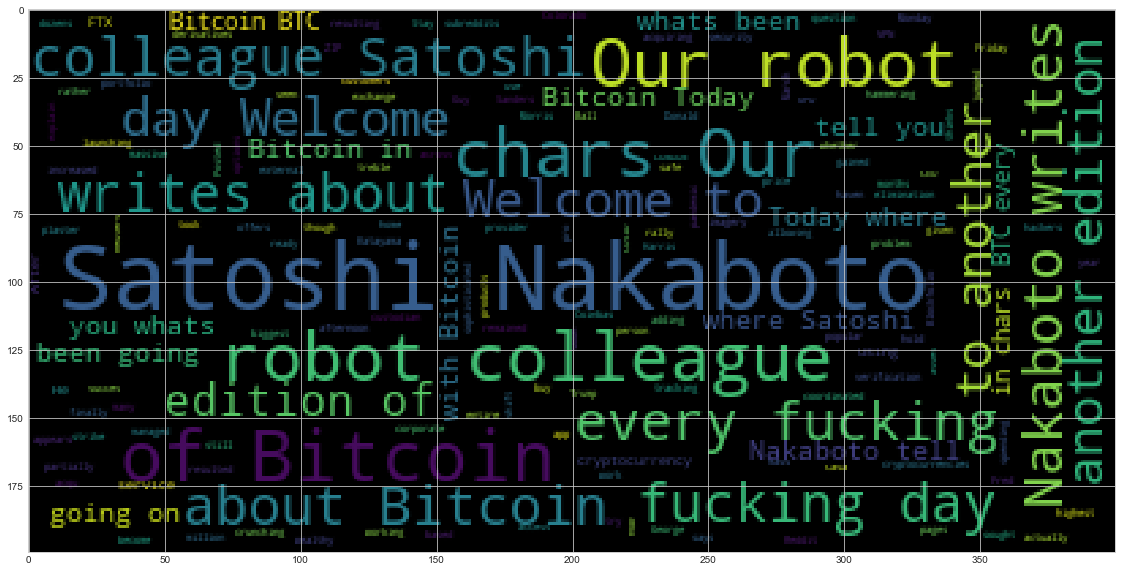

In [31]:
# Generate the Bitcoin word cloud
wc = WordCloud().generate(all_text)
plt.imshow(wc)

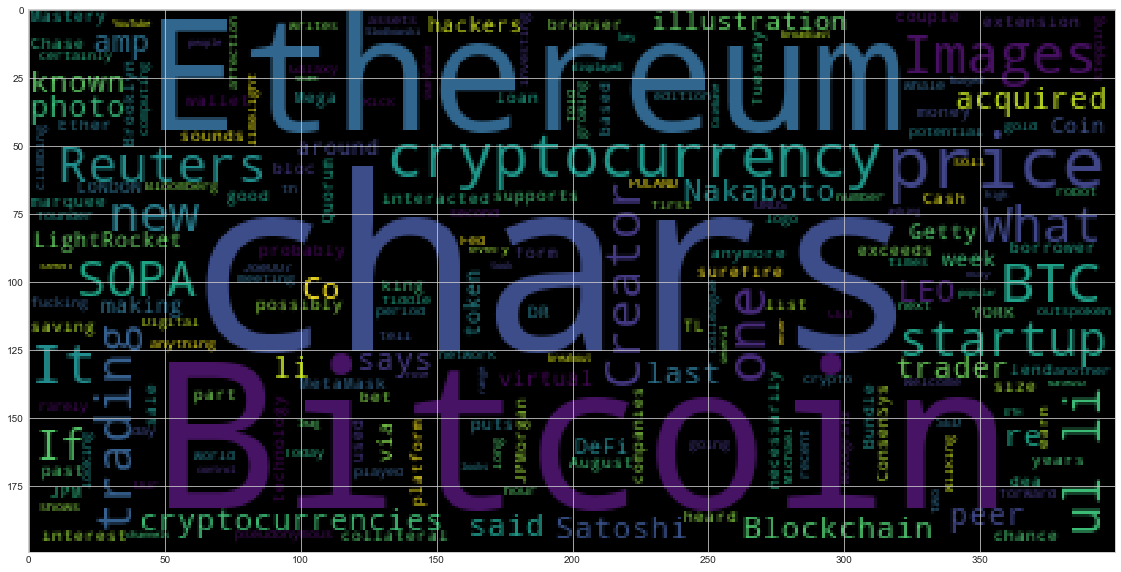

In [32]:
# Generate the Ethereum word cloud
wc = WordCloud().generate(all_text_ethereum)
plt.imshow(wc)

In [42]:
from nltk.corpus import reuters 
import spacy
from wordcloud import WordCloud 
import matplotlib.pyplot as plt


In [34]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [43]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [54]:
# Concatenate all of the bitcoin text together
doc = nlp(all_text)

In [55]:
# Run the NER processor on all of the text
displacy.render(doc, style = 'ent')
# Add a title to the document

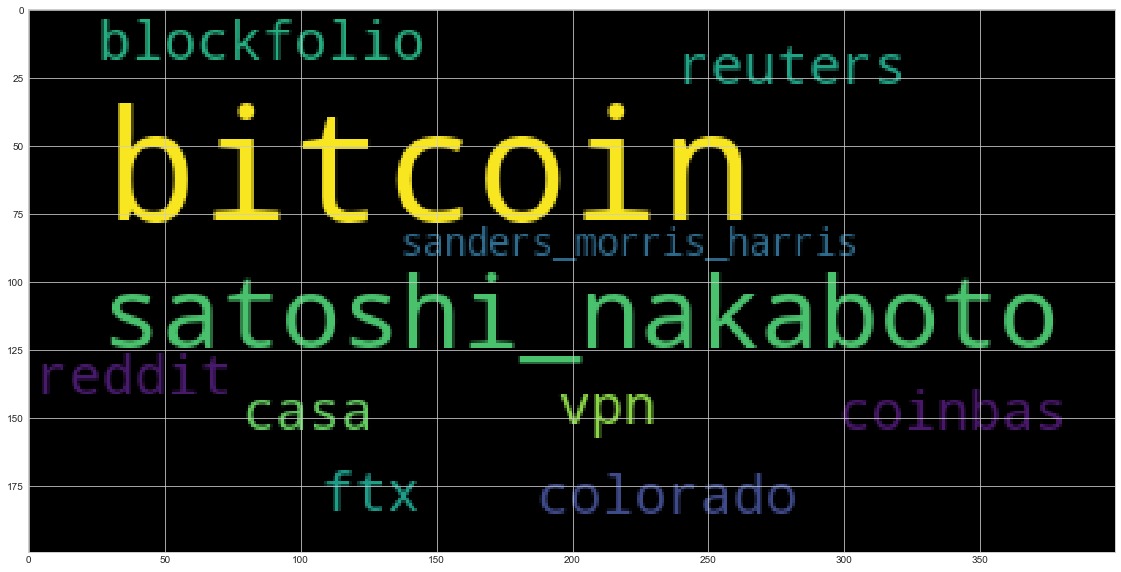

In [57]:
# Render the visualization
entities = [ent.text for ent in doc.ents if ent.label_ in ['GPE', 'ORG']]
entities = [i.lower().replace(' ', '_') for i in entities]
wc = WordCloud().generate(' '.join(entities))
plt.imshow(wc)

In [60]:
# List all Entities
print(entities)

['casa', 'colorado', 'coinbas', 'vpn', 'reddit', 'reuters', 'bitcoin', 'satoshi_nakaboto', 'bitcoin', 'bitcoin', 'bitcoin', 'satoshi_nakaboto', 'bitcoin', 'bitcoin', 'bitcoin', 'satoshi_nakaboto', 'bitcoin', 'bitcoin', 'bitcoin', 'blockfolio', 'ftx', 'satoshi_nakaboto', 'bitcoin', 'bitcoin', 'bitcoin', 'satoshi_nakaboto', 'bitcoin', 'bitcoin', 'bitcoin', 'satoshi_nakaboto', 'bitcoin', 'bitcoin', 'bitcoin', 'satoshi_nakaboto', 'bitcoin', 'bitcoin', 'bitcoin', 'satoshi_nakaboto', 'bitcoin', 'bitcoin', 'bitcoin', 'satoshi_nakaboto', 'bitcoin', 'bitcoin', 'bitcoin', 'satoshi_nakaboto', 'bitcoin', 'bitcoin', 'bitcoin', 'satoshi_nakaboto', 'bitcoin', 'bitcoin', 'bitcoin', 'satoshi_nakaboto', 'bitcoin', 'bitcoin', 'bitcoin', 'satoshi_nakaboto', 'bitcoin', 'bitcoin', 'bitcoin', 'sanders_morris_harris', 'bitcoin']


---

## Ethereum NER

In [ ]:
# Concatenate all of the bitcoin text together

In [61]:
# Run the NER processor on all of the text
doc_etheruem = nlp(all_text_ethereum)
displacy.render(doc_etheruem, style = 'ent')

# Add a title to the document

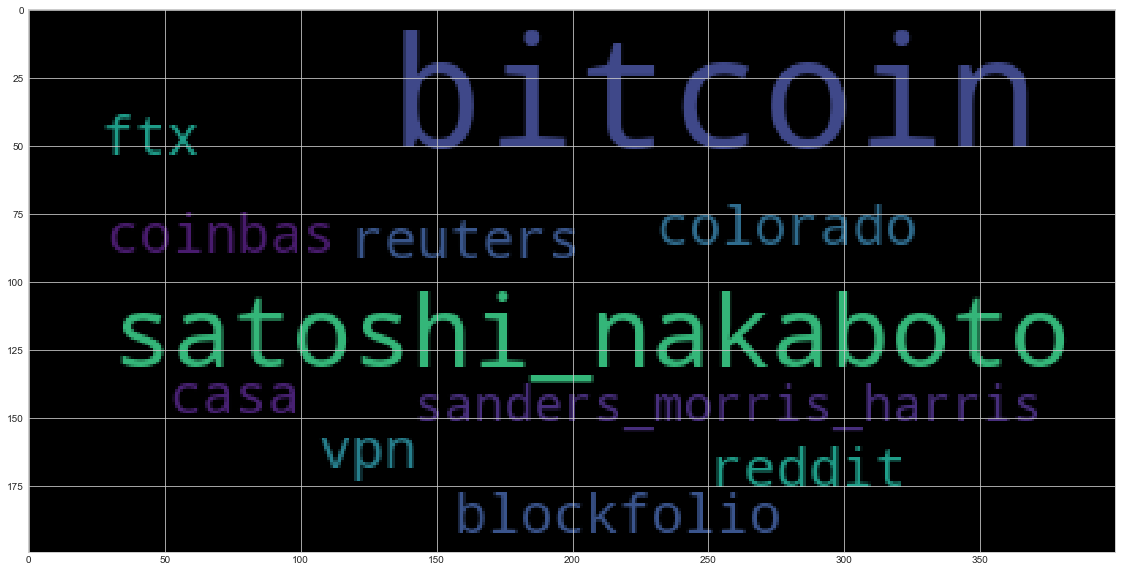

In [62]:
# Render the visualization
entities_ethereum = [ent.text for ent in doc.ents if ent.label_ in ['GPE', 'ORG']]
entities_ethereum = [i.lower().replace(' ', '_') for i in entities]
wc = WordCloud().generate(' '.join(entities))
plt.imshow(wc)

In [64]:
# List all Entities
print(entities_ethereum)

['casa', 'colorado', 'coinbas', 'vpn', 'reddit', 'reuters', 'bitcoin', 'satoshi_nakaboto', 'bitcoin', 'bitcoin', 'bitcoin', 'satoshi_nakaboto', 'bitcoin', 'bitcoin', 'bitcoin', 'satoshi_nakaboto', 'bitcoin', 'bitcoin', 'bitcoin', 'blockfolio', 'ftx', 'satoshi_nakaboto', 'bitcoin', 'bitcoin', 'bitcoin', 'satoshi_nakaboto', 'bitcoin', 'bitcoin', 'bitcoin', 'satoshi_nakaboto', 'bitcoin', 'bitcoin', 'bitcoin', 'satoshi_nakaboto', 'bitcoin', 'bitcoin', 'bitcoin', 'satoshi_nakaboto', 'bitcoin', 'bitcoin', 'bitcoin', 'satoshi_nakaboto', 'bitcoin', 'bitcoin', 'bitcoin', 'satoshi_nakaboto', 'bitcoin', 'bitcoin', 'bitcoin', 'satoshi_nakaboto', 'bitcoin', 'bitcoin', 'bitcoin', 'satoshi_nakaboto', 'bitcoin', 'bitcoin', 'bitcoin', 'satoshi_nakaboto', 'bitcoin', 'bitcoin', 'bitcoin', 'sanders_morris_harris', 'bitcoin']
